# methode 1 : direct

In [1]:
from time import time

def look_and_say_1(n):
    """Generate the look-and-say sequence up to term n.
    Returns a list of sequence members and elapsed times.
    ex : look_and_say_1(5)
    ([[1], [1, 1], [2, 1], [1, 2, 1, 1], [1, 1, 1, 2, 2, 1]], [0, 0.0, 0.0, 0.0, 0.0])
    """
    sequence = [[1]]
    elapsed = [0]
    start = time()

    for i in range(n-1):
        next_elem = []
        run_val = sequence[i][0]
        run_len = 1
        
        # loop through rest of sequence with dummy value at end
        for val in sequence[i][1:] + [-1]:
            if val != run_val:
                next_elem.extend([run_len, run_val])
                run_len = 1
                run_val = val
            else:
                run_len += 1

        sequence.append(next_elem)
        elapsed.append(time() - start)

    return sequence, elapsed
    

## affiche le temps pour calculer n termes (ou la plage de termes chosis)

In [3]:
n = 60
time_n_terms = look_and_say_1(n)[1][:]
#print(*[''.join(map(str, term)) for term in next_ten_terms], sep = '\n\n')
#print("indidual time : ",*[time for time in time_ten_terms], sep = ' ')
print(f"total time : {time_n_terms[-1]}")

total time : 4.875091314315796


# methode 2 : par récurrence

In [4]:
import pandas as pd
from itertools import groupby
from time import time

def get_sequence(arr,n,sequence):
    """
    fait quoi : fonctionne par récurrence mais fonctionnement précis à revoir
    """
    if n == 0:
        return arr
    else:
        current = ''.join(str(len(list(group))) + key for key,group in groupby(sequence))
        arr.append(current)
        get_sequence(arr,n-1,current)
    return arr

def look_and_say_2(n, sequence='1'):
    """
    generate the look-and-say sequence (list of string) up to term n
    you can choose the seed
    ex : look_and_say_2(5)
    (['1', '11', '21', '1211', '111221', '312211'], 0.0)
    """
    arr = [sequence]
    start = time()
    final_sequence = get_sequence(arr,n,sequence)
    end = time() - start
    return final_sequence, end

## affiche le temps pour calculer n termes (ou la plage de termes chosis)

In [115]:
n = 60
time_n_all = look_and_say_2(n)[1]
#print(*[''.join(term) for term in next_ten_terms], sep = '\n\n')
print(f"total time : {time_n_all}")

total time : 15.028366804122925


la méthode 1 est plus rapide, ce qui semble normal vu que la méthode 2 est une méthode par récurrence  
voici un aperçu de la taille des termes et de leurs temps de calcul nécessaire pour la méthode 1

# tracer de la longueur des termes et du temps (méthode 1)

In [6]:
n = 70
sequence, elapsed = look_and_say_1(n)
indicies = [i + 1 for i in range(n)]

## tracé normal ou logarithmique (pour voir la constante de conway)

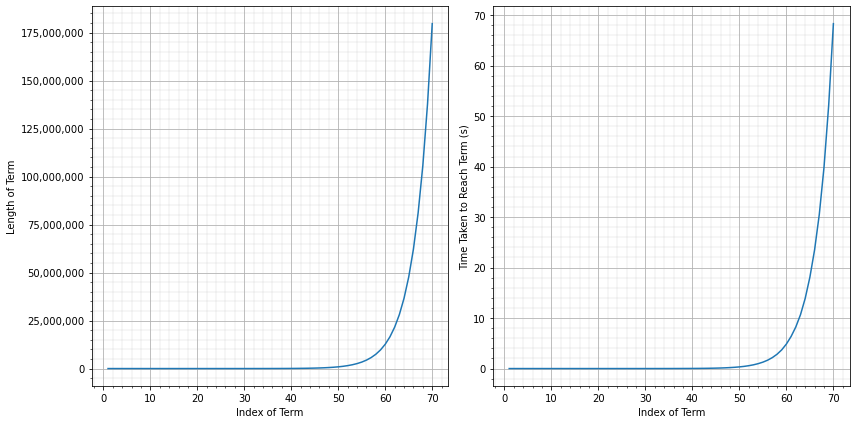

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(indicies, [len(term) for term in sequence])
axs[0].set_xlabel('Index of Term')
axs[0].set_ylabel('Length of Term')
axs[0].ticklabel_format(style='plain', useLocale=False, axis='y')
axs[0].get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
# axs[0].set_yscale('log')
axs[0].grid()
axs[0].minorticks_on()
axs[0].grid(which='minor', linestyle='-', linewidth=.2)
axs[1].plot(indicies, elapsed)
axs[1].set_xlabel('Index of Term')
axs[1].set_ylabel('Time Taken to Reach Term (s)')
# axs[1].set_yscale('log')
axs[1].grid()
axs[1].minorticks_on()
axs[1].grid(which='minor', linestyle='-', linewidth=.2)

fig.patch.set_facecolor('white')
fig.tight_layout();